# Plasma Communication Overhead Investigation

In this notebook we investigate the overhead of writing tensors to plasma and reading it, comparing it to just sending the image to zmq. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import glob

In [7]:
files = glob.glob("../results/remote/*.txt")

In [8]:
arrs = {
    path.split('/')[3].split('.')[0]: np.loadtxt(path) for path in files
}
arrs

{'plasma': array([3917., 2865., 2597., ..., 1920., 1976., 2032.]),
 'zmq': array([2198., 1699., 1475., ...,  963., 1130., 1234.])}

In [9]:
arrs['plasma'].mean() - arrs['zmq'].mean()

1068.7095

(0, 4000)

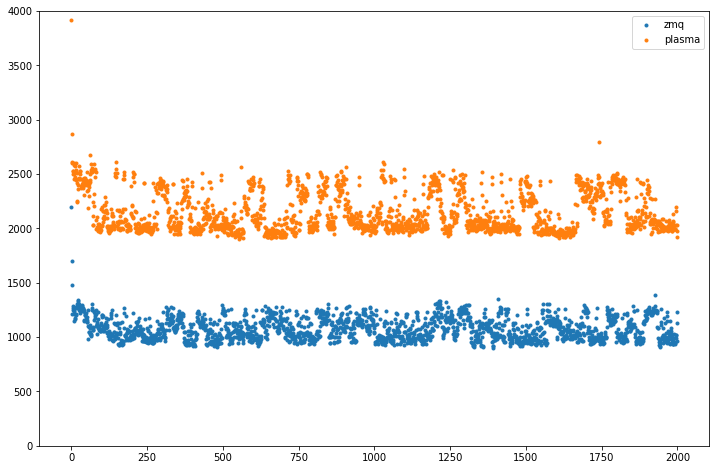

In [11]:
plt.figure(figsize=(12,8))
for name, arr in arrs.items():
#     if 'noop' not in name:
    plt.scatter(np.arange(2000), arr, label=name, marker='.')
plt.legend()
plt.ylim(0, 4000)

Text(0.5,1,'Distribution of durations (500 - 5000 us)')

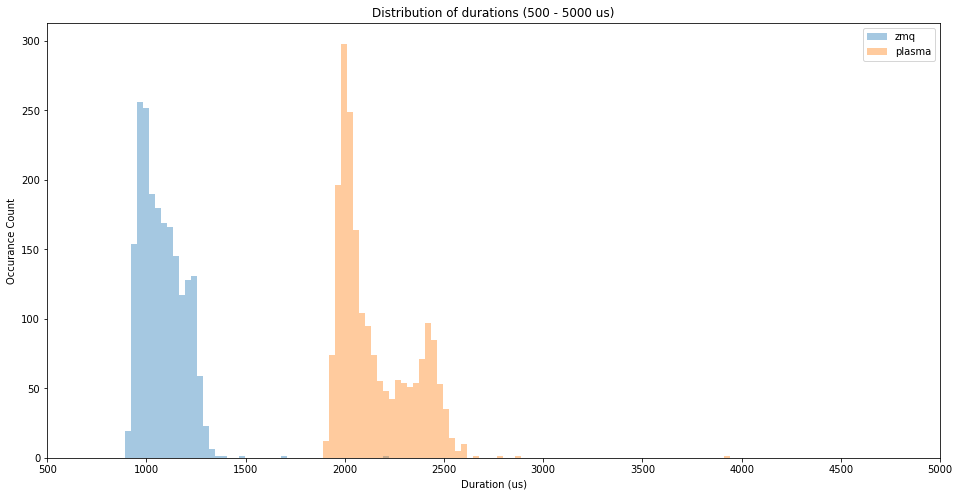

In [13]:
plt.figure(figsize=(16,8))
for name in arrs.keys():
    sns.distplot(arrs[name], bins=np.linspace(500, 5000, num=150), label=name, kde=False)
plt.xlim(500, 5000)
plt.legend()
plt.ylabel("Occurance Count")
plt.xlabel("Duration (us)")
plt.title("Distribution of durations (500 - 5000 us)")

## Fine-grained Plasma Performance Investigation

In [21]:
ts = pd.read_csv('../results/remote/plasma-fine.csv', header=None).drop(4,axis=1)

In [42]:
ts[1].mean()

1611.148

In [22]:
ts = pd.concat([pd.Series(np.zeros(2000).astype(int), name='start'), ts], axis=1)

In [23]:
ts_durations = ts.diff(axis=1).drop('start',axis=1)

In [25]:
timestamp = \
[
  'plasma_send', 'plasma_recv', 'model_send', 'model_recv'
]

In [41]:
ts_durations.median(axis=0)

0     347.0
1    1212.5
2       7.0
3     389.0
dtype: float64

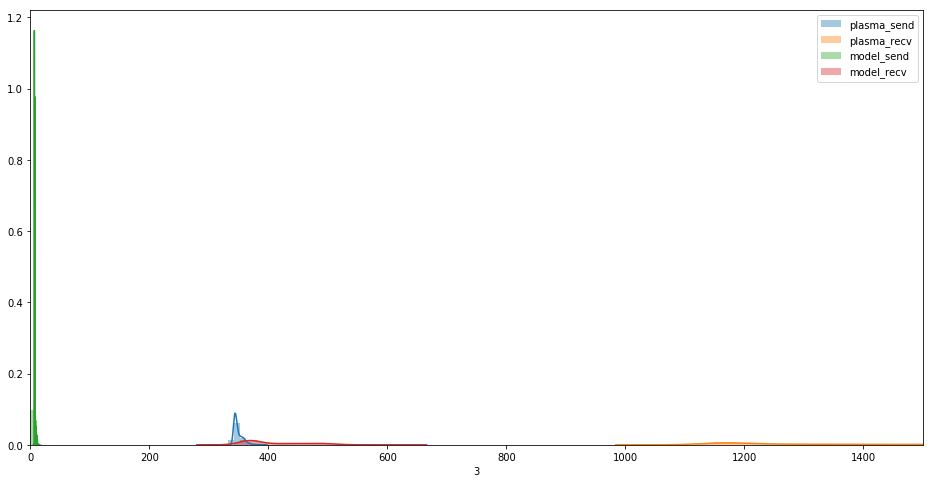

In [31]:
plt.figure(figsize=(16,8))

for name, col in zip(timestamp, ts_durations.columns):
    sns.distplot(ts_durations[col], bins=np.linspace(0,1500,num=150), label=name)
plt.xlim(0, 1500)
plt.legend()

In [43]:
 pd.read_csv('../results/remote/zmq-fine.csv', header=None)[1].mean()

1193.119

In [47]:
(ts[3] - ts[1]).mean()

417.6555